## DATA SCIENCE PIPELINE:

<img src="pic1.png">

##                                  Feature Engineering    :

#### Types of Missing Data:
1.MCAR(no relation between missing data and feature)

2.MNCAR(some relation between missing data and feature)

3.MAR

#### Techniques to handle Missing Data (only popular ones):

1.Mean/Median/Mode replacement:
This works well when data is MCAR.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
median=df['Age'].median()

In [6]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)    

In [7]:
impute_nan(df,'Age',median)

In [8]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

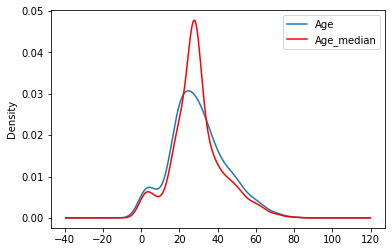

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

2.Random Sample imputation: This works well when data is MCAR

In [11]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [12]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [13]:
impute_nan(df,"Age")

In [14]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


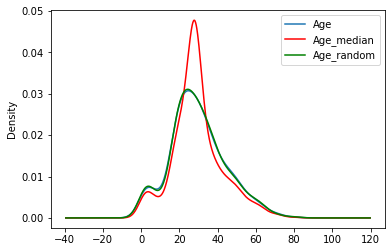

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### HANDLING CATEGORICAL MISSING DATA

3.Frequent Category Imputation

In [16]:
df=pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [17]:
df.shape

(1460, 4)

In [18]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [19]:
a=df.isnull().mean().sort_values()

In [20]:
pd.DataFrame(a,columns=["Missing percentage"])

,Missing percentage
SalePrice,0.000000
BsmtQual,0.025342
GarageType,0.055479
FireplaceQu,0.472603


 Checking the frequency of every feature

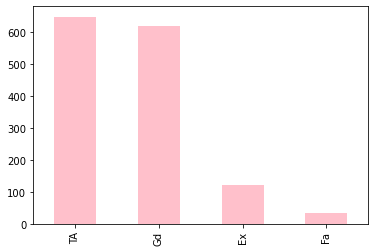

In [21]:
df['BsmtQual'].value_counts().plot.bar(color="pink",alpha=1)

Missing values will be replaced by TA

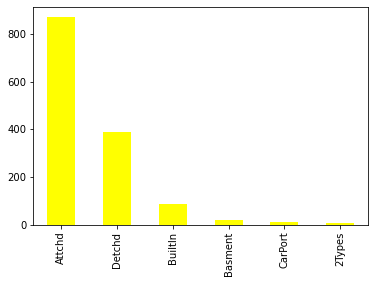

In [22]:
df['GarageType'].value_counts().plot.bar(color="yellow",alpha=1)

Missing values will be replaced by Attchd

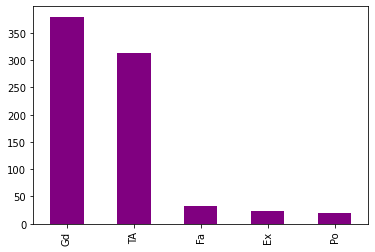

In [23]:
df['FireplaceQu'].value_counts().plot.bar(color="purple",alpha=1)

Missing values will be replaced by Gd

In [24]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [25]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [27]:
df["GarageType"].isnull().sum()

0

4. Replacing Nan with "Missing"/ "new category"

In [28]:
import numpy as np

In [29]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [30]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


#### HANDLING CATEGORICAL FEATURES

1. One Hot Encoding

In [32]:
#### Onehotencoding with many categories in a feature

In [33]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [34]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [35]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [36]:
lst_10=df.X0.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [37]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X0']==categories,1,0)

In [38]:
lst_10.append('X0')

In [39]:
df[lst_10]

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak
4205,0,0,0,0,0,0,0,0,0,0,j
4206,0,1,0,0,0,0,0,0,0,0,ak
4207,0,0,0,0,0,0,0,0,0,0,al


2. Ordinal Number Encoding

In [40]:
import datetime

In [41]:
today_date=datetime.datetime.today()

In [42]:
today_date

datetime.datetime(2020, 11, 20, 18, 57, 12, 810788)

In [43]:
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [44]:
df=pd.DataFrame(days,columns=["Day"])

In [45]:
df['weekday']=df['Day'].dt.weekday
df.head()

,Day,weekday
0,2020-11-20 18:57:12.810788,4
1,2020-11-19 18:57:12.810788,3
2,2020-11-18 18:57:12.810788,2
3,2020-11-17 18:57:12.810788,1
4,2020-11-16 18:57:12.810788,0


3.Count/Frequency Encoding

4.Target Guided Ordinal Encoding

5.Mean Encoding

6.Probability Ratio Encoding

#### Transformation of features 

Why Transformation of Features are required?

So that Some Algos (Linear Reg,Logistic Reg, KNN,K MEANS,ANN,CNN,RNN) can have a better accuracy score.


Types Of Transformation:

1.Normalization And Standardization  (StandardScaler())

2.Scaling to Minimum And Maximum values (MinMaxScaler())

3.Scaling To Median And Quantiles (RobustScaler())

4.Guassian Transformation :
Logarithmic Transformation,Reciprocal Tranasformation,Square Root Transformation,Exponential Transformation,Box Cox Transformation

Guassian Transformation:

Some machine learning algorithms like linear and logistic assume that the features are normally distributed to have a better accuracy and a model performance.

By Transforming the features we generally transform the skewed data to normalized data.

In [46]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [48]:
med=df["Age"].median()

In [49]:
df["Age"].fillna(med,inplace=True)

What is Q-Q Plot?

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential.

In [50]:
import scipy.stats as stat
import pylab

In [51]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

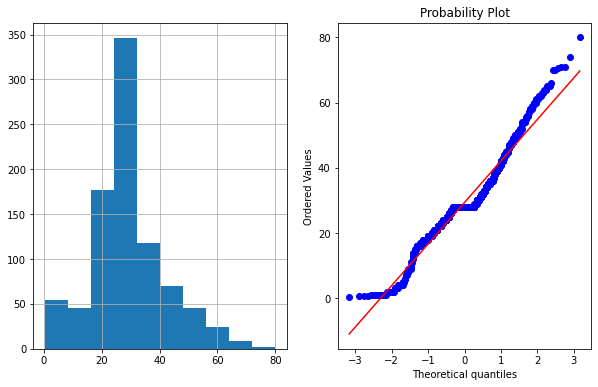

In [52]:
plot_data(df,"Age")

By the above plots we can see that "Age" feature is normally distributed and it doesn't need further transformation.

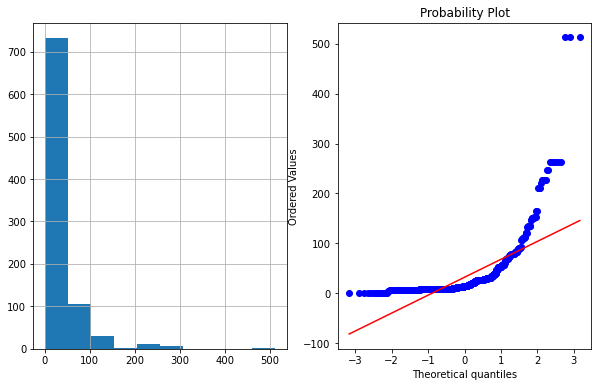

In [53]:
plot_data(df,"Fare")

We can see that "Fare" feature is not normally distributed and it requires transformation

Logarthimic Transformation:

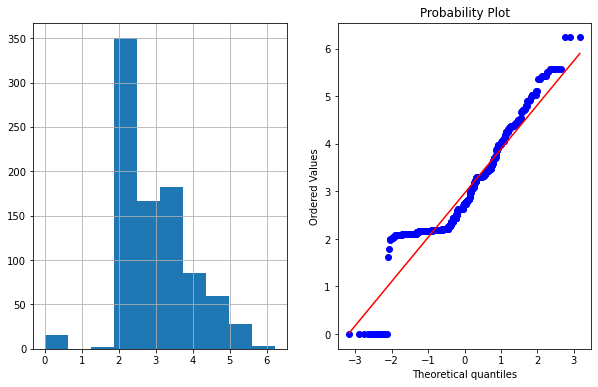

In [54]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

Other Kinds of Transformation on Age Feature

Reciprocal Transformation:

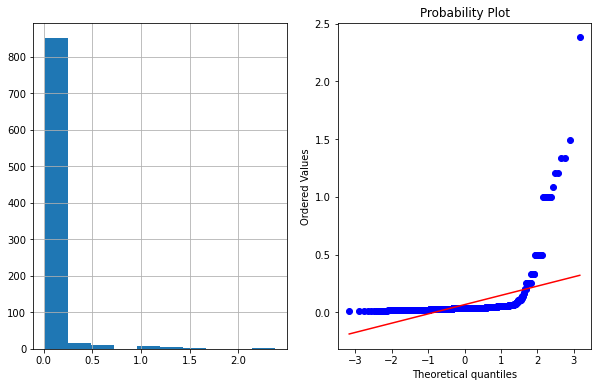

In [55]:
df["Age_Rec"]=1/df["Age"]
plot_data(df,'Age_Rec')

Square Root Trans:

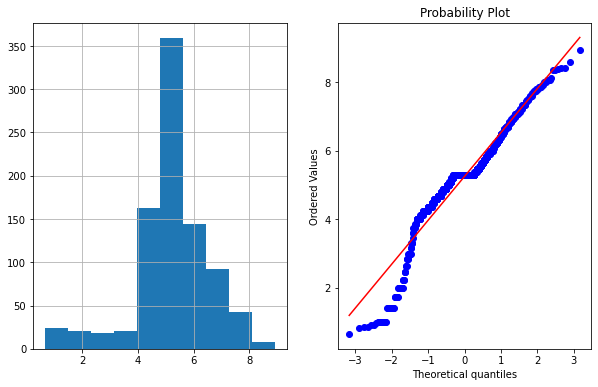

In [56]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

Exponential Trans:

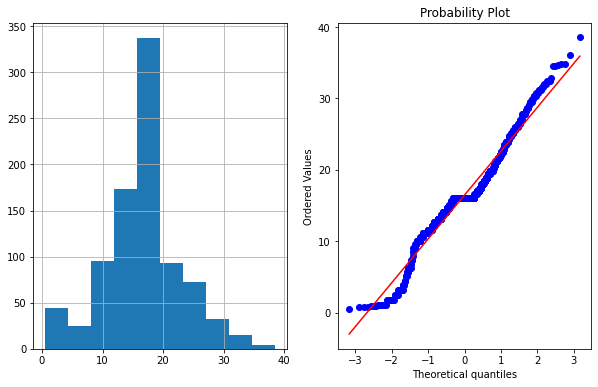

In [57]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

BoxCox Trans:
    
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

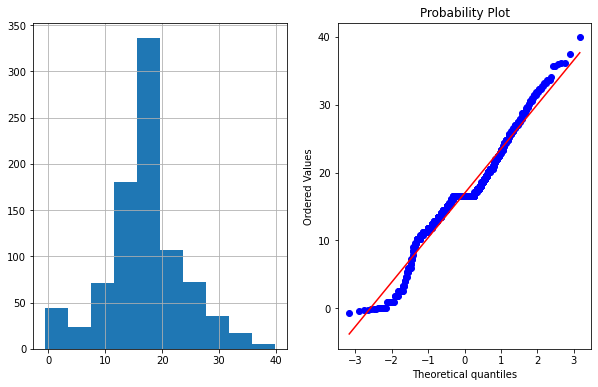

In [58]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
plot_data(df,'Age_Boxcox')

#### Outliers

An outlier is a value that escapes normality and can (and probably will) cause anomalies in the results obtained through algorithms and analytical systems.

In the below methods we will try to include the outliers in our dataset.

In [60]:
df=pd.read_csv("titanic_train.csv")

When data is Gaussian Distributed:

Text(0, 0.5, 'No of passenger')

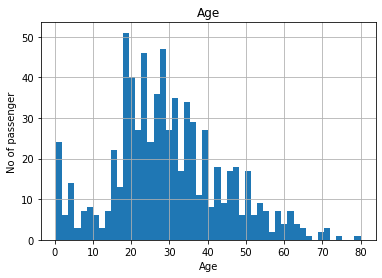

In [63]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

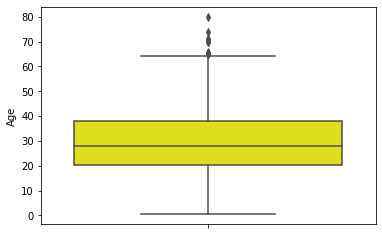

In [90]:
import seaborn as sns
sns.boxplot(y=df["Age"],color="Yellow")

In [74]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
#Finding the boundaries which will differntiate the outliers
upper_boundary=df["Age"].mean()+3*df["Age"].std()
lower_boundary=df["Age"].mean()-3*df["Age"].std()

In [69]:
upper_boundary 

73.27860964406095

In [68]:
lower_boundary

-13.88037434994331

When data is Skewed

Text(0, 0.5, 'Amount')

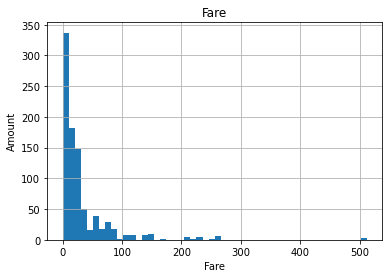

In [78]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Amount')

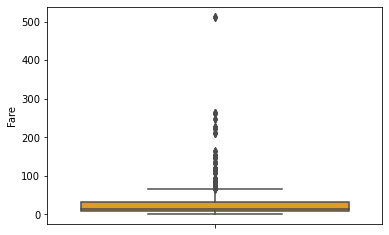

In [89]:
sns.boxplot(y=df["Fare"],color="orange")

In [92]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [93]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [94]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [97]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)